1. [Изучение общей информации](#information)
    
    
2. [Подготовка данных](#data)
    * [Замена названия столбцов (привод к нижнему регистру)](#a)
    * [Преобразование данных в нужные типы](#b)
    * [Обработайте пропуски](#c)
    * [Подсчет суммарных продаж во всех регионах](#d)
    
    
3. [Исследовательский анализ данных](#research)     
    
    * [Сколько игр выпускалось в разные годы](#aa)
    * [Как менялись продажи по платформам](#bb)
    * [Какие платформы лидируют по продажам, растут или падают](#cc)
    * [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#dd)
    * [Общее распределение игр по жанрам](#ee)
    
4. [Портрет пользователя каждого региона](#portrait)    
    * [Самые популярные платформы (топ-5)](#aaa)
    * [Самые популярные жанры (топ-5)](#bbb)
    * [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#ccc)
    
    
5. [Проверка гипотез](#testing)   
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#aaaa)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#bbbb)
    

6. [Общий вывод](#conclusion)   

In [1]:
import pandas as pd #импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

##  Изучение общей информации
<a id="information"></a> 

In [2]:
data = pd.read_csv('...') #чтение датасета

In [3]:
data.head() #просмотр датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


`name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
data.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Имеются пропуске в столбцах: `Name`, `Year_of_Release`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Изменить тип данных можно в столбцах: `Year_of_Release`, `Critic_Score`, `User_Score`.

**Изучание отсутствующих значений**

In [5]:
data[data['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `Name` отсутствуют значения у 2х строк. В этих строках наблюдается много отсутствующих значений. Некоторые могут быть просто не известны(`Critic_Score`, `User_Score`, `Rating`), или просто данные столбцы были пропущенны при заполнении.

In [6]:
data[data['Year_of_Release'].isnull()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В столбце `Year_of_Release` отсутствуют значения у 269 строк. Возможно они не заполнились из-за присутствия года в названиях, из-за отсутсвия точных данных или возможно некоторые их просто забыли заполнить.

In [7]:
data[data['Genre'].isnull()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У `Genre` такие же пропущенные столбцы как у и столбца `Name`, можно стедать такие же выводы.

In [8]:
data[data['Critic_Score'].isnull()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В столбце `Critic_Score` отсутствует 8578 значений. Это возможно из-за того что у данных игр отсутствует оценка критиков.

In [9]:
data[data['User_Score'].isnull()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В столбце `User_Score` отсутствует 6701 значение. Это возможно из-за того что у данных игр отсутствует оценка пользователей.

In [10]:
data[data['Rating'].isnull()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В столбце `Rating` отсутствует 6766 значений. Это возможно из-за того что у данных игр отсутствует рейтинг, или он просто был не заполнен.

Так же замеченно, что часто у всех 3х стобцах одновремменно(`Critic_Score`,`User_Score`, `Rating`) отсутствуют данные. С чем это связано предположить затрудняюсь.

## Подготовка данных
<a id="data"></a> 

### Замена названия столбцов (привод к нижнему регистру)
<a id="a"></a> 

In [11]:
data.columns = data.columns.str.lower() #привод к нижнему регистру

In [12]:
data.head() #просмотр результата

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

Все названия столбцов были преобразованы в нижний регистр.

### Преобразование данных в нужные типы
<a id="b"></a> 

In [13]:
data['year_of_release'].unique() #привод к нижнему регистру

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
data['year_of_release'] = data['year_of_release'].astype('Int64') #изменение типа данных

In [15]:
data['critic_score'].unique() #привод к нижнему регистру

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
data['critic_score'] = data['critic_score'].astype('Int64') #изменение типа данных

In [17]:
data['user_score'].unique() #привод к нижнему регистру

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.nan , regex= True) #замена значения на nan

В столбце `User_Score` было замечена аббревиатура  **tbd**, она обозначает "будет определено". Так как у неё нет определенного значения, такие сточки были заменены на **nan**.

In [19]:
data['user_score'] = data['user_score'].astype('float') #изменение типа данных

In [20]:
data.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


**Вывод**

Столбцы: `Year_of_Release` и `Critic_Score` были преведены к типу **Int64**, а столбец `User_Score` к типу **float64**. Так же в столбце `User_Score` было замечена аббревиатура  **tbd**, она обозначает "будет определено". Так как у неё нет определенного значения, такие сточки были заменены на **nan**.

### Обработайте пропуски
<a id="c"></a> 

In [21]:
data['name'] = data['name'].fillna('-') #замена значения на "-"

In [22]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [23]:
data['user_score'] = data['user_score'].fillna(-1)

In [24]:
data['genre'] = data['genre'].fillna('-')

In [25]:
data['rating'] = data['rating'].fillna('-')

In [26]:
data.duplicated().sum()

0

In [27]:
data[['name','platform']].duplicated().sum()

5

In [28]:
data[data[['name','platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,-,GEN,1993,-,1.78,0.53,0.00,0.08,-1,-1.0,-
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
14244,-,GEN,1993,-,0.00,0.00,0.03,0.00,-1,-1.0,-
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [29]:
data[['name','platform','year_of_release']].duplicated().sum()

2

In [30]:
data[data[['name','platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,-,GEN,1993,-,1.78,0.53,0.00,0.08,-1,-1.0,-
14244,-,GEN,1993,-,0.00,0.00,0.03,0.00,-1,-1.0,-
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [31]:
data[['name','platform','year_of_release','na_sales']].duplicated().sum()

0

**Вывод**

Пропуски в столбце `name` были заменены на **-**, так как в дальнейшем по этому столбцу будет производится подсчет.

Пропуски в столбцах `critic_score`, `user_score` были замененны на **-1**, так как замена на **0**  может исказить данные, из-за того что оценка **0** может присутствовать изначально.

Пропуски в столбцах `genre` и `rating` были заменены на **-**.

После заполнения пропущенных значений явных дубликатов не было обнаружено. 

При поиске неявных дубликатов по паре `name`-`platform`, было выявленно **5** дубликатов. Но при добвления `year_of_release` **3** дубликата ушли. Скорее всего одна и таже игра выпускалась повторно в разные года, тем самым это можно не считать дубликатом. При сочитании `name`-`platform`-`year_of_release`, осталось **2** дубликата, но при добавлении `all_sales` и эти дубликаты исчезли, можно предположить, что данные игры записали дважды, но по продажам в разных странах. Эти данные будут нужны для подсчета общих продаж, так что их тоже можно не удалять.

### Подсчет суммарных продаж во всех регионах
<a id="d"></a> 

In [32]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns') #создание нового столбца

In [33]:
data.head() #просмотр результата

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,-,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,-,31.38


**Вывод**

Был создан столбец `all_sales` с суммарнными продажами по всем регионам.

## Исследовательский анализ данных
<a id="research"></a> 

### Сколько игр выпускалось в разные годы
<a id="aa"></a> 

In [34]:
game_year = data.groupby(['year_of_release']).agg({'name':'count'}) #создание таблицы

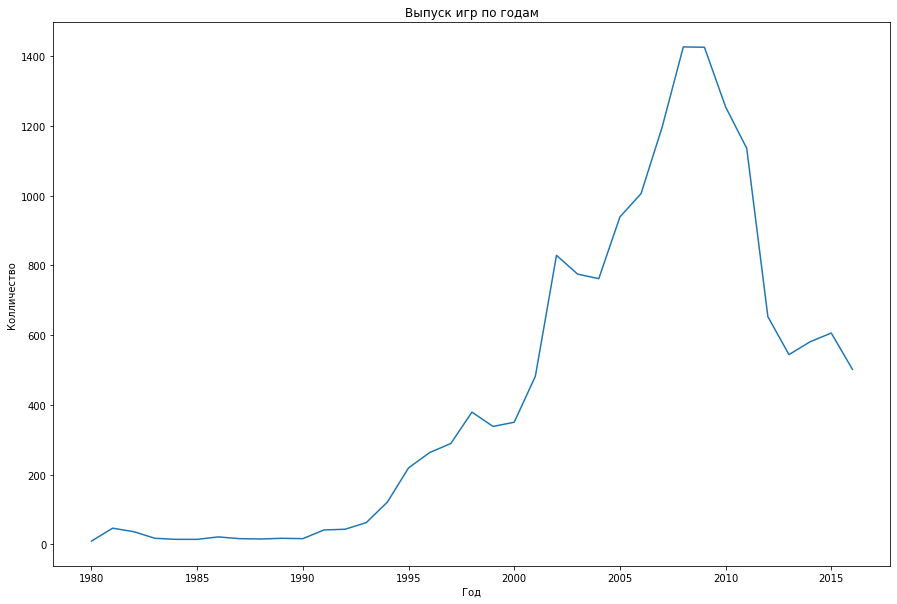

In [35]:
plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=game_year, x="year_of_release", y="name")
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()

С периода **1980** до примерно **1993**, число выпущенных игор сильно не отличалось. Потом пошел резкий скачек длившейся до примерно **2007** года(из-за развития в игровой индустрии и технологиях), затем выпуск игр начало так же резко уменьшатся до самого **2016** года(это произошло из-за кризиса, студии закрывались, производство игр уменьшалось).

### Как менялись продажи по платформам
<a id="bb"></a> 

In [36]:
game_platform = data.pivot_table(index='platform',values='all_sales', aggfunc='sum')#создание таблицы
game_platform_10 = game_platform.sort_values(by = 'all_sales', ascending = False).head(10)#просмотр результата

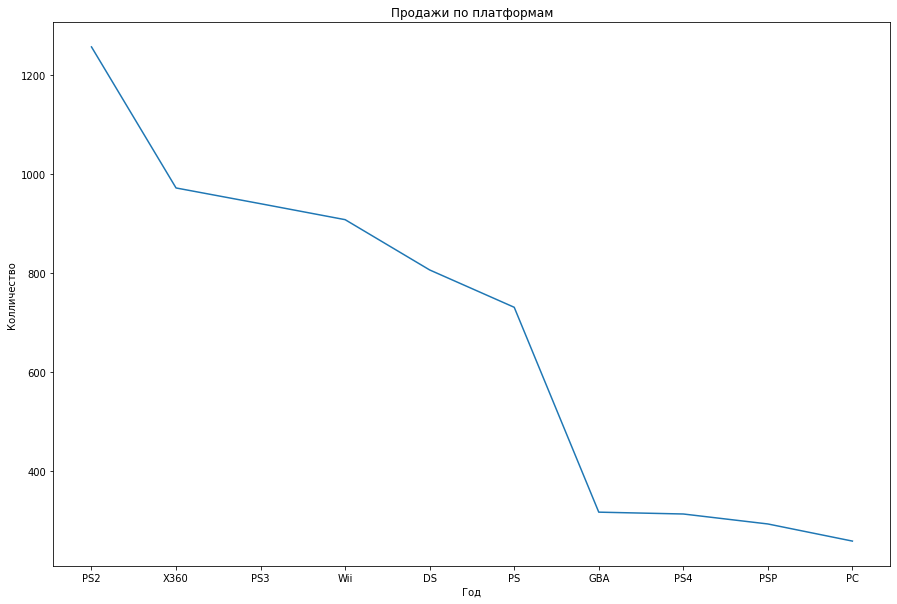

In [37]:
plt.figure(figsize=(15,10))  #построение графика
sns.lineplot(data=game_platform_10, x="platform", y="all_sales")
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()

Платформы с наибольшими суммарными продажами за весь представленный период стали: `PS2`,`X360`,`PS3`,`Wii`,`DS`,`PS`,`GBA`,`PS4`,`PSP`,`PC`.

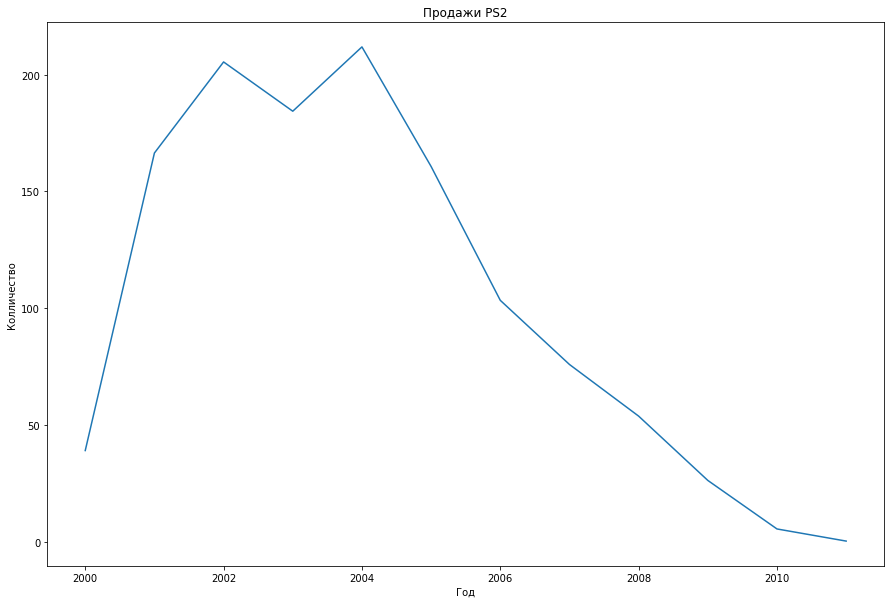

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
all_sales,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.9,26.4,5.64,0.45


In [38]:
PS2_age = data.loc[data['platform'] == 'PS2'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PS2_age, x="year_of_release", y="all_sales")
plt.title('Продажи PS2')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PS2_age.T

Платформа `PS2` стартовала в **2000** году, пик продаж игр на нее был в **2004** году, а конец продаж в **2011** году

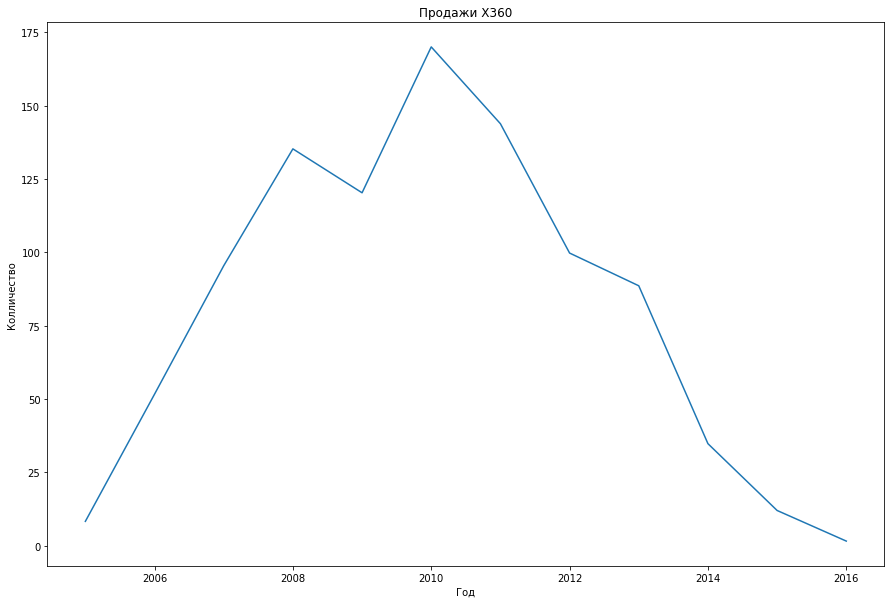

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
all_sales,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


In [39]:
X360_age = data.loc[data['platform'] == 'X360'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=X360_age, x="year_of_release", y="all_sales")
plt.title('Продажи X360')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
X360_age.T

Платформа `X360` стартовала в **2005** году, пик продаж игр на нее был в **2010** году, а минимум продаж в **2016** году

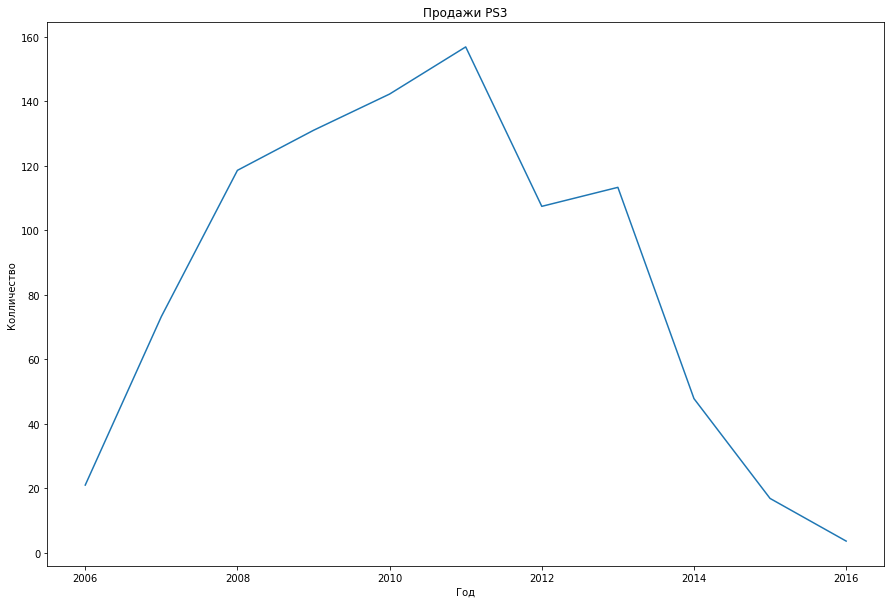

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
all_sales,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.6


In [40]:
PS3_age = data.loc[data['platform'] == 'PS3'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PS3_age, x="year_of_release", y="all_sales")
plt.title('Продажи PS3')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PS3_age.T

Платформа `X360` стартовала в **2006** году, пик продаж игр на нее был в **2013** году, а минимум продаж в **2016** году

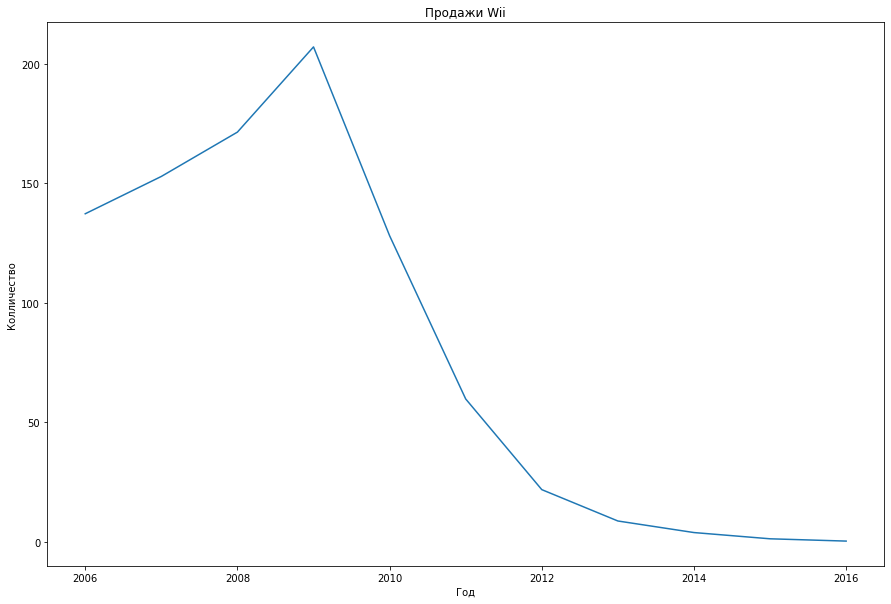

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
all_sales,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


In [41]:
Wii_age = data.loc[data['platform'] == 'Wii'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=Wii_age, x="year_of_release", y="all_sales")
plt.title('Продажи Wii')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
Wii_age.T

Платформа `Wii` стартовала в **2006** году, пик продаж игр на нее был в **2009** году, а минимум продаж в **2016** году

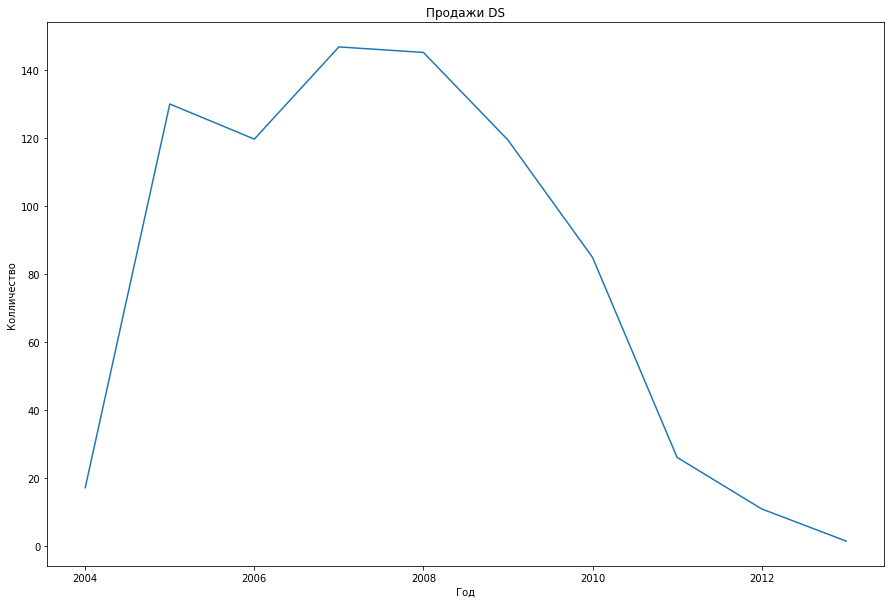

year_of_release,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
all_sales,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54


In [42]:
DS_age = data.loc[(data['platform'] == 'DS') & (data['year_of_release'] > 1985)]
DS_age =  DS_age.groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=DS_age, x="year_of_release", y="all_sales")
plt.title('Продажи DS')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
DS_age.T

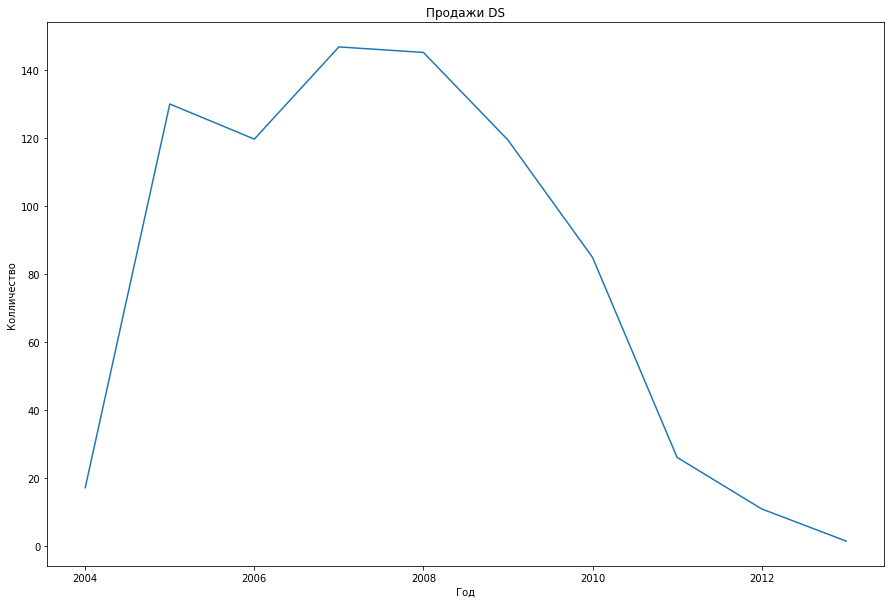

year_of_release,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
all_sales,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54


In [43]:
plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=DS_age, x="year_of_release", y="all_sales")
plt.title('Продажи DS')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
DS_age.T

Был замечен выброс в данных, где игра на `DS` была датированна **1985** годом, скорее всего это ошибка ввода. Платформа `DS` стартовала в **2004** году, пик продаж игр на нее был в **2007** году, а конец продаж в **2013** году.

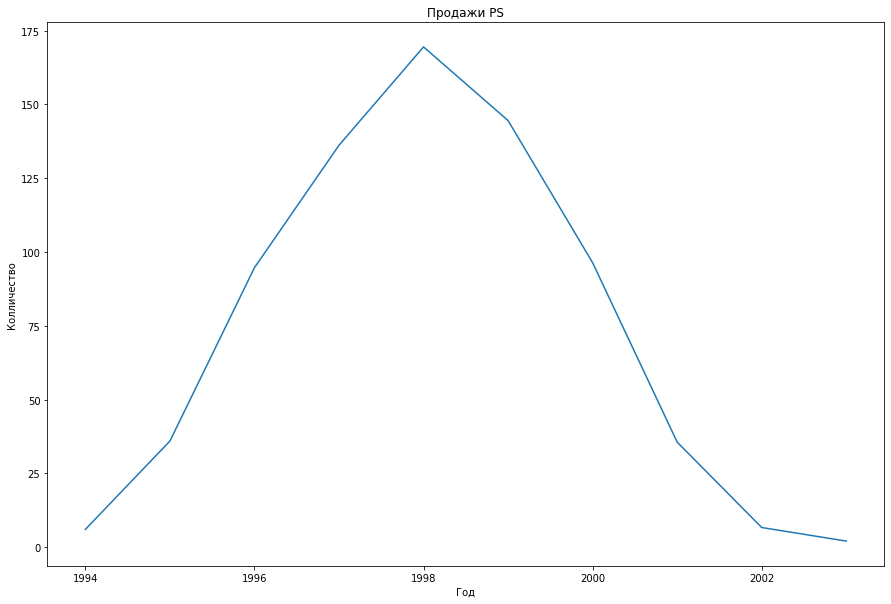

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
all_sales,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07


In [44]:
PS_age = data.loc[data['platform'] == 'PS'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PS_age, x="year_of_release", y="all_sales")
plt.title('Продажи PS')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PS_age.T

Платформа `PS` стартовала в **1994** году, пик продаж игр на нее был в **1998** году, а конец продаж в **2003** году.

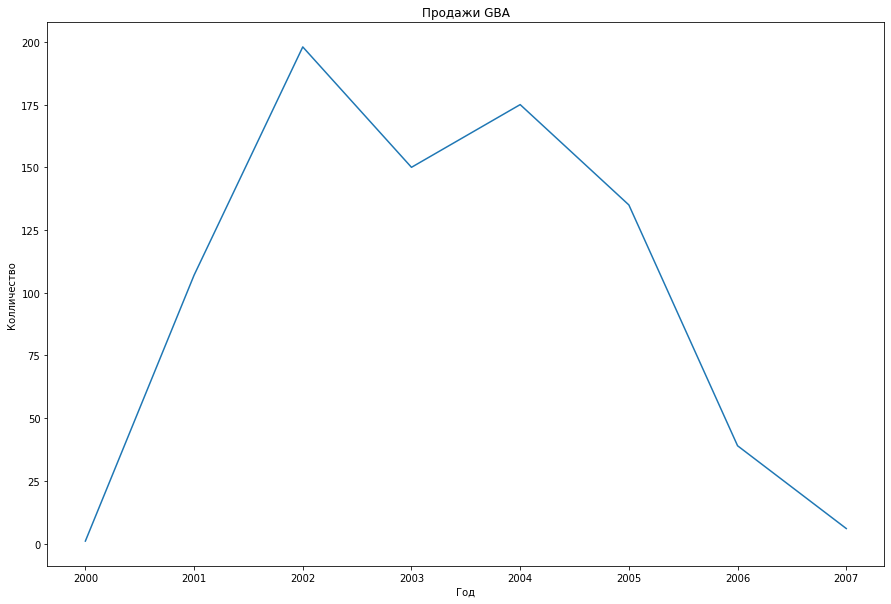

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007
all_sales,1,107,198,150,175,135,39,6


In [45]:
GBA_age = data.loc[data['platform'] == 'GBA'].groupby(['year_of_release']).agg({'all_sales':'count'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=GBA_age, x="year_of_release", y="all_sales")
plt.title('Продажи GBA')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
GBA_age.T

Платформа `GBA` стартовала в **2000** году, пик продаж игр на нее был в **2002** году, а конец продаж в **2007** году.

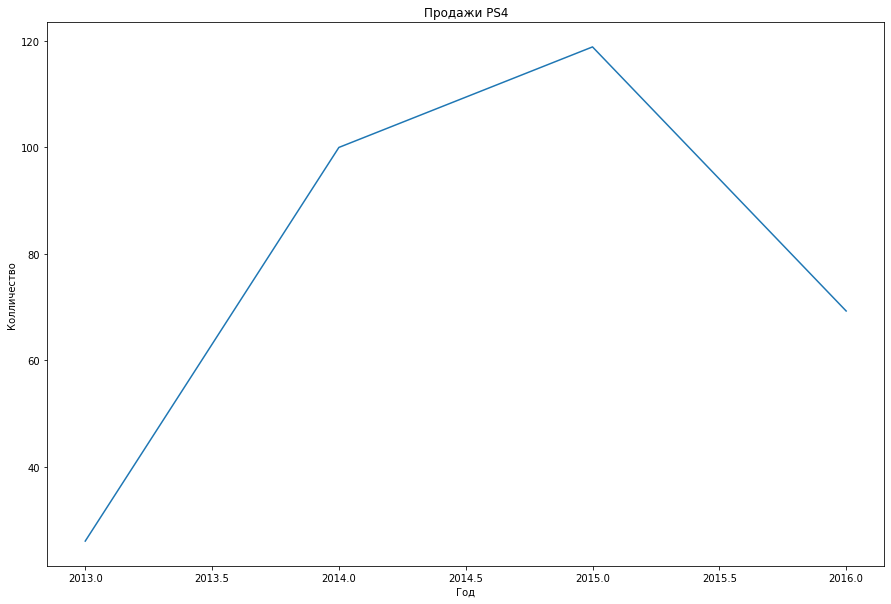

year_of_release,2013,2014,2015,2016
all_sales,25.99,100.0,118.9,69.25


In [46]:
PS4_age = data.loc[data['platform'] == 'PS4'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PS4_age, x="year_of_release", y="all_sales")
plt.title('Продажи PS4')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PS4_age.T

Платформа `PS4` стартовала в **2013** году, пик продаж игр на нее был в **2015** году, к **2016** году продажи сократились.

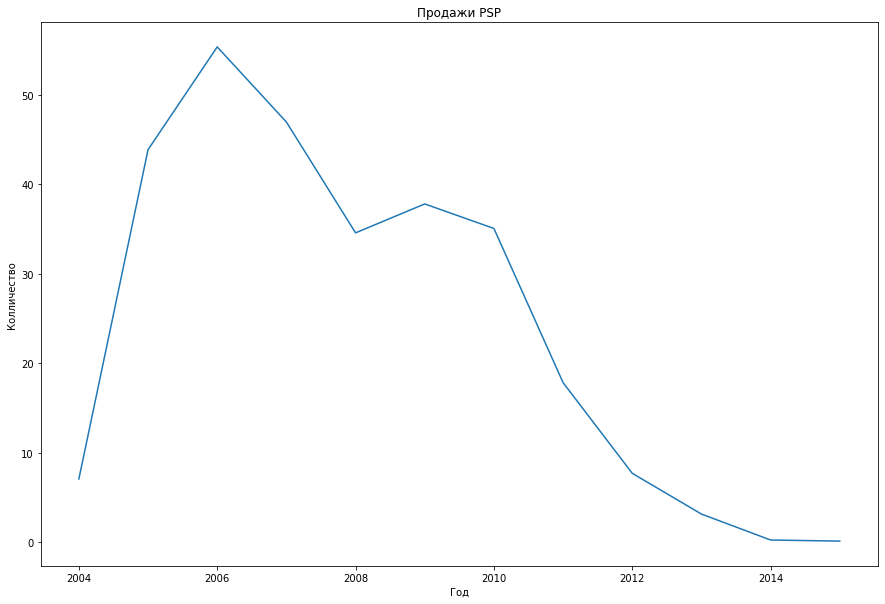

year_of_release,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
all_sales,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12


In [47]:
PSP_age = data.loc[data['platform'] == 'PSP'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PSP_age, x="year_of_release", y="all_sales")
plt.title('Продажи PSP')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PSP_age.T

Платформа `PSP` стартовала в **2004** году, пик продаж игр на нее был в **2006** году, а конец продаж в **2015** году.

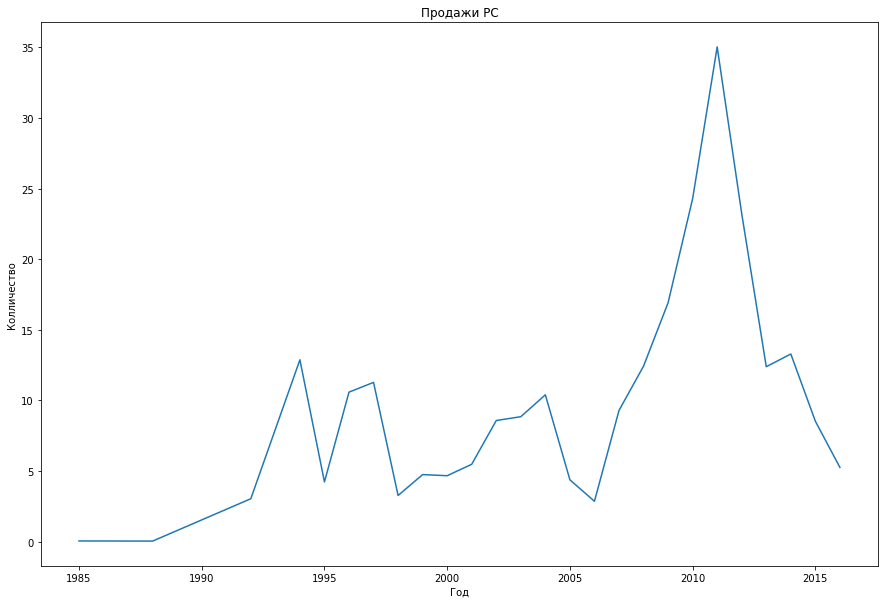

year_of_release,1985,1988,1992,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
all_sales,0.04,0.03,3.03,12.87,4.22,10.58,11.27,3.26,4.74,4.66,...,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


In [48]:
PC_age = data.loc[data['platform'] == 'PC'].groupby(['year_of_release']).agg({'all_sales':'sum'}) #создание таблицы

plt.figure(figsize=(15,10)) #построение графика
sns.lineplot(data=PC_age, x="year_of_release", y="all_sales")
plt.title('Продажи PC')
plt.xlabel('Год')
plt.ylabel('Колличество')
plt.show()
PC_age.T

Платформа `PC` стартовала в **1985** году, пик продаж игр на нее был в **2011** году, к **2016** году продажи сократились.

Актуальный период **10** лет, так как это время сколько в среднем живут платформы. 

### Какие платформы лидируют по продажам, растут или падают
<a id="cc"></a> 

In [49]:
new_data = data.loc[data['year_of_release']>=2014] #создание таблицы

In [50]:
sales_platform = new_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum') 
#создание таблицы
sales_platform

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


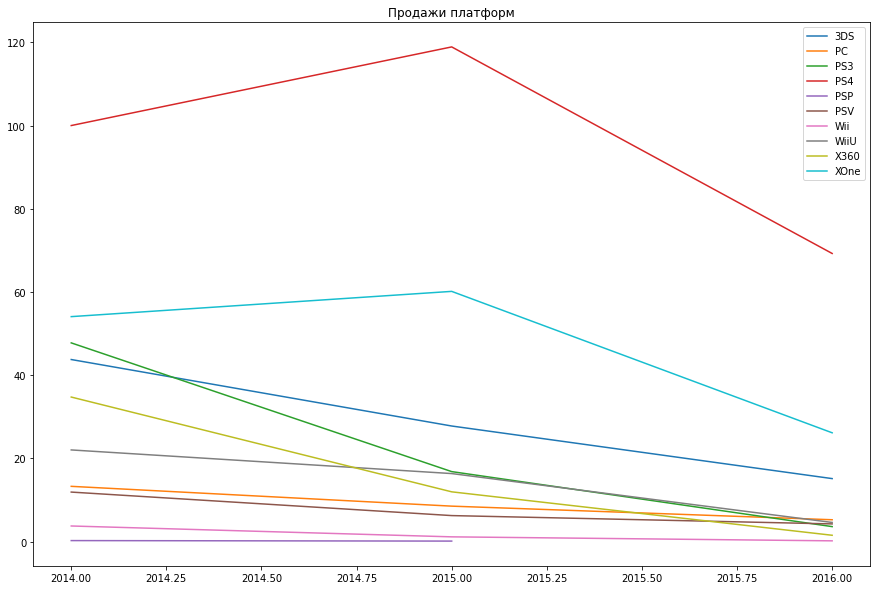

In [51]:
plt.figure(figsize=(15,10)) #построение графика
plt.plot(sales_platform)
plt.title('Продажи платформ')
plt.legend(sales_platform)
plt.show()

На 2016 год продажи всех платформ падают, но в явных лидерах остаютя такие платформы как: `PS4`, `XOne` и `3DS`.

In [52]:
sales_platform.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.180000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.084853,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.120000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.150000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.180000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.210000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.240000,11.900000,3.750000,22.030000,34.740000,60.140000


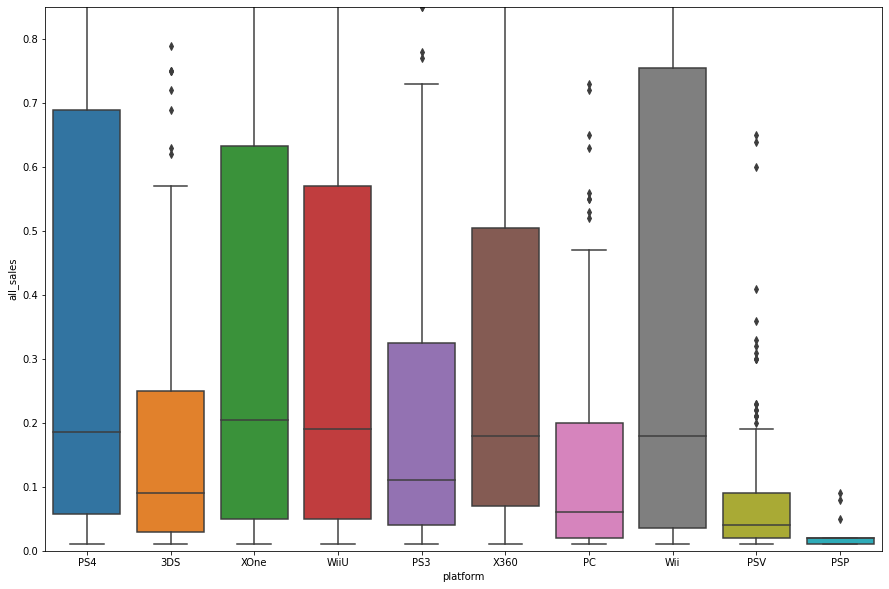

In [53]:
plt.figure(figsize=(15,10)) #построение графика
sns.boxplot(data=new_data, x='platform', y='all_sales')
plt.ylim(0, 0.85)
plt.show()

По графику «ящик с усами» видно, что перспективными платформами являются: `PS4`,`XOne`, `WiiU`, `X360`, `Wii`.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
<a id="dd"></a> 

За основу была взята самая современная(из датасета) консоль с высокими продажами: `PS4`.

In [54]:
reviews_PS4 = new_data.loc[(new_data['platform']=='PS4')&(new_data['user_score']>=0)&(new_data['critic_score']>=0)] 
#создание таблицы

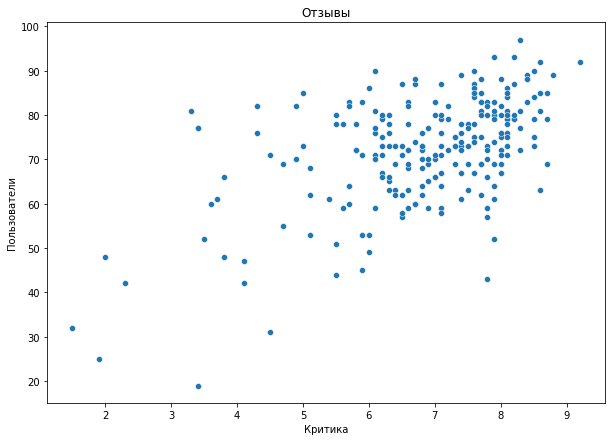

In [55]:
plt.figure(figsize=(10,7)) #построение диаграммы
sns.scatterplot(x='user_score', y='critic_score', data=reviews_PS4)
plt.title('Отзывы')
plt.xlabel('Критика')
plt.ylabel('Пользователи')
plt.show()

По диаграмме рассеяния видно, что отзывы критиков и пользователей в основном высокие.

In [56]:
reviews_PS4_cor = reviews_PS4[['critic_score','user_score', 'all_sales']] #создание таблицы
reviews_PS4_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.546434,0.401903
user_score,0.546434,1.000000,-0.043186
all_sales,0.401903,-0.043186,1.000000


По таблице корреляции видно что зависимость продаж на `PS4` от отзывов критиков **слабая**, а от отзывов пользователей **независима**.

In [57]:
reviews_PS3 = new_data.loc[new_data['platform']=='PS3'] #создание таблицы
reviews_PS3_cor = reviews_PS3[['critic_score','user_score', 'all_sales']]
reviews_PS3_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.517588,0.023612
user_score,0.517588,1.000000,0.207528
all_sales,0.023612,0.207528,1.000000


По таблице корреляции видно что зависимость продаж на `PS3` от отзывов критиков и пользователей **слабая**.

In [58]:
reviews_WiiU = new_data.loc[new_data['platform']=='WiiU'] #создание таблицы
reviews_WiiU_cor = reviews_WiiU[['critic_score','user_score', 'all_sales']]
reviews_WiiU_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.828859,0.291296
user_score,0.828859,1.000000,0.253694
all_sales,0.291296,0.253694,1.000000


По таблице корреляции видно что зависимость продаж на `WiiU` от отзывов критиков и пользователей **слабая**.

In [59]:
reviews_X360 = new_data.loc[new_data['platform']=='X360'] #создание таблицы
reviews_X360_cor = reviews_X360[['critic_score','user_score', 'all_sales']]
reviews_X360_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.372796,0.004012
user_score,0.372796,1.000000,0.083922
all_sales,0.004012,0.083922,1.000000


По таблице корреляции видно что зависимость продаж на `X360` от отзывов критиков и пользователей **независима**.

In [60]:
reviews_XOne = new_data.loc[new_data['platform']=='XOne'] #создание таблицы
reviews_XOne_cor = reviews_XOne[['critic_score','user_score', 'all_sales']]
reviews_XOne_cor.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.800121,0.271476
user_score,0.800121,1.000000,0.106714
all_sales,0.271476,0.106714,1.000000


По таблице корреляции видно что зависимость продаж на `XOne` от отзывов критиков **слабая**, а от отзывов пользователей **независима**.

**Вывод**

В основном, по таблице корреляции было видно, что зависимость продаж  от отзывов критиков **слабая**, а от отзывов пользователей **независима**.

### Общее распределение игр по жанрам
<a id="ee"></a> 

In [61]:
genre_game = new_data.pivot_table(index='genre', values='all_sales', aggfunc='median') #создание таблицы
genre_game = genre_game.sort_values(by = 'all_sales', ascending = False)

genre_game

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


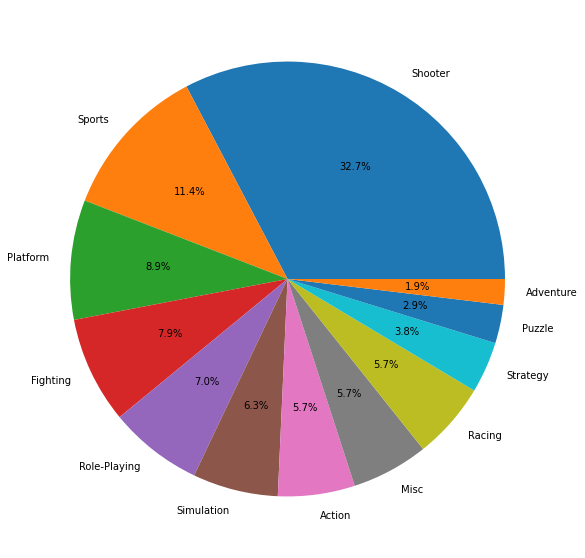

In [62]:
fig = plt.figure(figsize =(15, 10)) #построение диаграммы
plt.pie(genre_game.all_sales, labels = genre_game.index, autopct='%1.1f%%')
plt.show()

**Вывод**

Самые прибыльные жанры: `Shooter`, `Sports`, `Platform`. Самые не прибыльные жанры: `Strategy`, `Puzzle`, `Adventure`.

## Портрет пользователя каждого региона
<a id="portrait"></a> 

### Самые популярные платформы (топ-5)
<a id="aaa"></a> 

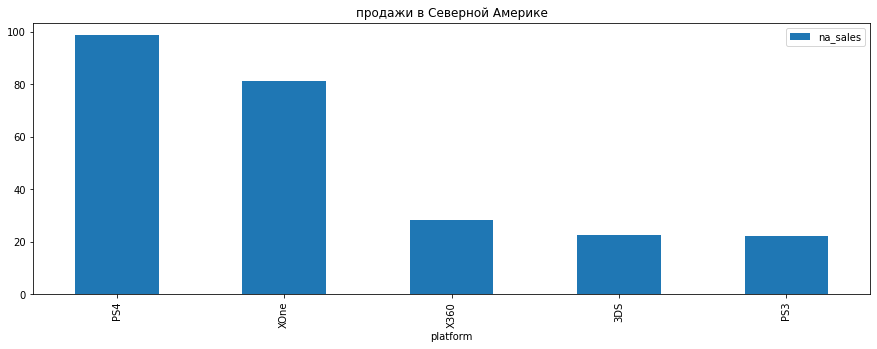

In [63]:
na_top = new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum') #создание таблицы
na_top = na_top.sort_values(by = 'na_sales', ascending = False).head()

na_top.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Северной Америке')
plt.show()

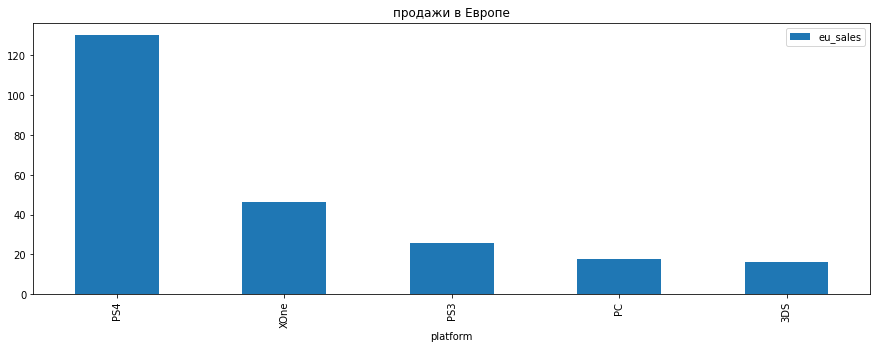

In [64]:
eu_top = new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum') #создание таблицы
eu_top = eu_top.sort_values(by = 'eu_sales', ascending = False).head()

eu_top.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Европе')
plt.show()

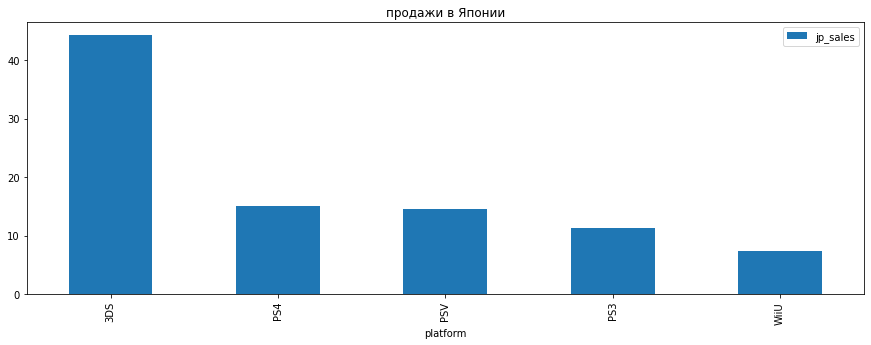

In [65]:
jp_top = new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_top = jp_top.sort_values(by = 'jp_sales', ascending = False).head() #создание таблицы

jp_top.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Японии')
plt.show()

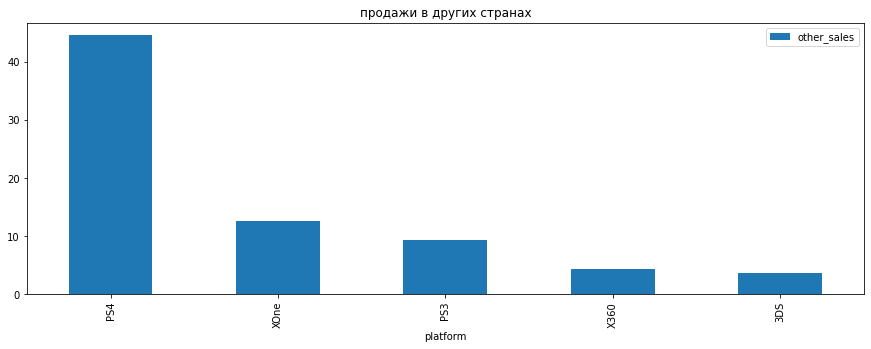

In [66]:
other_top = new_data.pivot_table(index='platform', values='other_sales', aggfunc='sum') #создание таблицы
other_top = other_top.sort_values(by = 'other_sales', ascending = False).head()

other_top.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в других странах')
plt.show()

**Вывод**

В Северной америке лидируют платформы: `PS4`,`XOne`, `X360`, `3DS`, `PS3`.

В Европе  лидируют платформы: `PS4`,`XOne`,`PS3`, `PC`, `3DS`.

В Японии  лидируют платформы: `3DS`, `PS4`, `PSV`, `PS3`,`WiiU`.

В других странах  лидируют платформы: `PS4`, `XOne`,`PS3`, `X360`, `3DS`.

В Северной америке и "других странах" лидирующие платформы одинаковые. В Европе вместо `X360` лидирует `PC`. А в Японии свои лидирующие платформы, совпадают только `3DS` и `PS4`.

### Самые популярные жанры (топ-5)
<a id="bbb"></a>

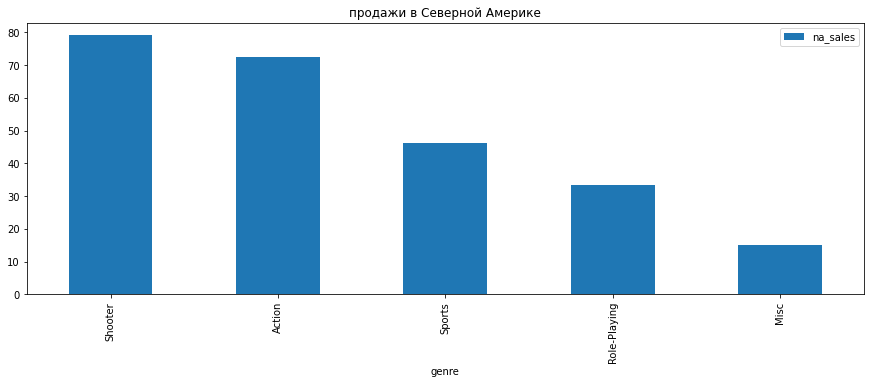

In [67]:
na_top_genre = new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head()
#создание таблицы
na_top_genre.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Северной Америке')
plt.show()

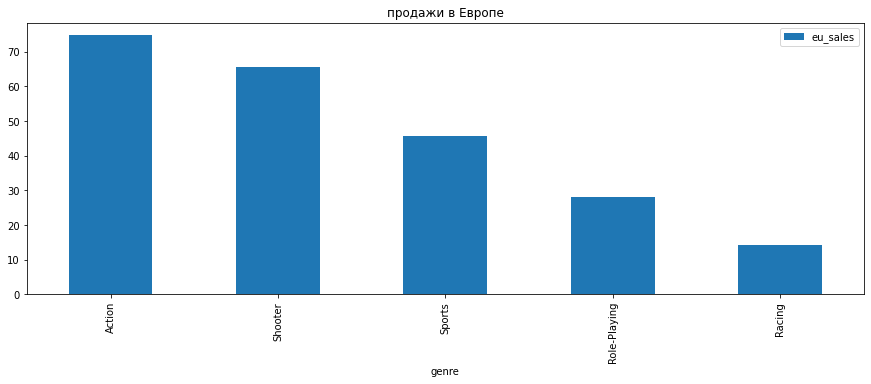

In [68]:
eu_top_genre = new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head()
#создание таблицы
eu_top_genre.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Европе')
plt.show()

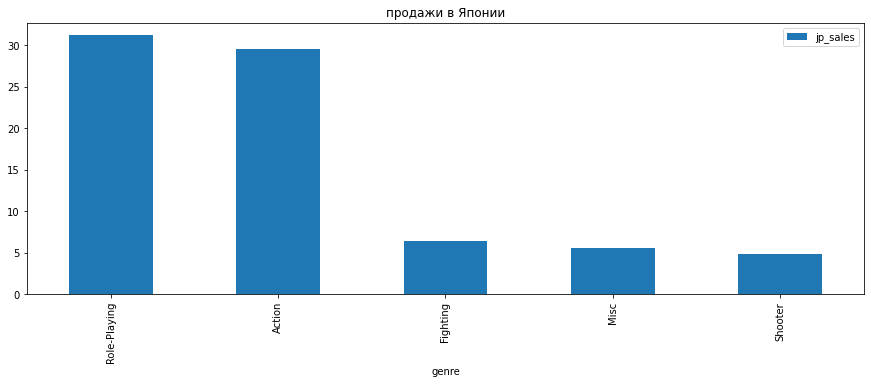

In [69]:
jp_top_genre  = new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head()
#создание таблицы
jp_top_genre.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в Японии')
plt.show()

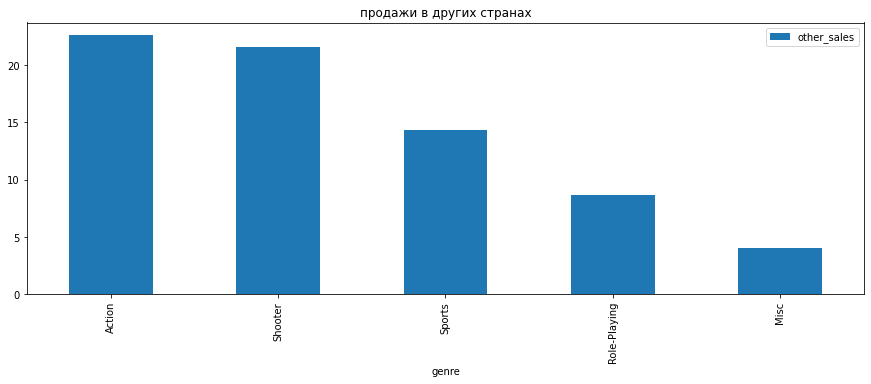

In [70]:
other_top_genre = new_data.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by = 'other_sales', ascending = False).head()
#создание таблицы
other_top_genre.plot(kind = 'bar', figsize=(15,5)) #построение диаграммы
plt.title('продажи в других странах')
plt.show()

**Вывод**

Лидирующие жанры везде почти одинаковые.

В Северной америке лидируют жанры: `Shooter`,`Action`, `Sports`, `Role-Playing`,  `Misc`.

В Европе  лидируют жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`.

В Японии  лидируют жанры: `Role-Playing`, `Action`, `Fighting`, `Misc`,`Shooter`.

В других странах  лидируют жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<a id="ccc"></a>

In [71]:
rating_ESRB = new_data.pivot_table(index='rating', values = ['na_sales','eu_sales','jp_sales','other_sales','all_sales'],
                                   aggfunc='sum')
#создание таблицы
rating_ESRB

,all_sales,eu_sales,jp_sales,na_sales,other_sales
rating,,,,,
-,198.97,58.95,56.90,64.72,18.40
E,133.13,58.06,8.94,50.74,15.39
E10+,71.68,26.16,4.46,33.23,7.83
M,226.54,93.44,8.01,96.42,28.67
T,99.13,34.07,14.78,38.95,11.33


**Вывод**

По своной таблице видно, что рейтинг влияет на продажи в отдельном регионе. Так игры с рейтингом **Т** более продаваемы в **Японии**, а с рейтингом **М** чуть менее продаваемы(отнасительно общим продажам в Японии), чем в других странах. Но больше всего продаж в Японии игр без рейтинга. Возможно, это потому, что оценкой возрастного рейтинга занимается другая компания **"CERO"**.

## Проверка гипотез
<a id="testing"></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<a id="aaaa"></a>

**Сформулируем нулевую гипотизу**:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем альтернативную гипотизу**: Средние пользовательские рейтинги платформ Xbox One и PC разные

**alpha** = 0.05

In [72]:
XOne_rating = new_data.loc[(new_data['platform'] == 'XOne')&(new_data['user_score']>=0)] #создание таблицы
print('Средние пользовательские рейтинги платформы Xbox One ', XOne_rating['user_score'].mean()) #просмотр среднего значения

Средние пользовательские рейтинги платформы Xbox One  6.594545454545456


In [73]:
PC_rating = new_data.loc[(new_data['platform'] == 'PC')&(new_data['user_score']>=0)] #создание таблицы
print('Средние пользовательские рейтинги платформы PC', PC_rating['user_score'].mean()) #просмотр среднего значения

Средние пользовательские рейтинги платформы PC 6.298360655737705


In [74]:
alpha = .05 #проверка гипотезы

results = st.ttest_ind(XOne_rating['user_score'], PC_rating['user_score'], equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги платформ `Xbox One` и `PC` **одинаковые**.

### Средние пользовательские рейтинги жанров Action и Sports разные
<a id="bbbb"></a>

**Сформулируем нулевую гипотизу**:   Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Сформулируем альтернативную гипотизу**:  Средние пользовательские рейтинги жанров Action и Sports разные

**alpha** = 0.05

In [75]:
action_rating = new_data.loc[new_data['genre'] == 'Action'] #создание таблицы
print('Средние пользовательские рейтинги жанра Action ', action_rating['user_score'].mean()) #просмотр среднего значения

Средние пользовательские рейтинги жанра Action  2.723586429725364


In [76]:
sports_rating = new_data.loc[new_data['genre'] == 'Sports'] #создание таблицы
print('Средние пользовательские рейтинги платформы Sports ', sports_rating['user_score'].mean()) #просмотр среднего значения

Средние пользовательские рейтинги платформы Sports  3.91055900621118


In [77]:
alpha = .05 #проверка гипотезы

results = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'], equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.829371809684136e-05
Отвергаем нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги жанров `Action` и `Sports` **разные**.

## Общий вывод
<a id="conclusion"></a>

При изучении общей информации было выявлено, что:
- Имеются пропуске в столбцах: `Name`, `Year_of_Release`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. 
- Изменить тип данных можно в столбцах: `Year_of_Release`, `Critic_Score`, `User_Score`.

При подготовке данных:
- Все названия столбцов были преобразованы в нижний регистр.
- Столбцы: `Year_of_Release` и `Critic_Score` были преведены к типу **Int64**, а столбец `User_Score` к типу **float64**. Так же в столбце `User_Score` было замечена аббревиатура  **tbd**, она обозначает "будет определено". Так как у неё нет определенного значения, такие сточки были заменены на **nan**.
- Пропуски в столбце `name` были заменены на **-**, так как в дальнейшем по этому столбцу будет производится подсчет.
Пропуски в столбцах `critic_score`, `user_score` были замененны на **-1**, так как замена на **0**  может исказить данные, из-за того что оценка **0** может присутствовать изначально.
Пропуски в столбцах `genre` и `rating` были заменены на **-**.
После заполнения пропущенных значений явных дубликатов не было обнаружено. 
При поиске неявных дубликатов по паре `name`-`platform`, было выявленно **5** дубликатов. Но при добвления `year_of_release` **3** дубликата ушли. Скорее всего одна и таже игра выпускалась повторно в разные года, тем самым это можне не считать дубликатом. При сочитании `name`-`platform`-`year_of_release`, осталось **2** дубликата, но при добавлении `all_sales` и эти дубликаты исчезли, можно предположить, что данные игры записали дважды, но по продажам в разных странах. Так как дубликатов по сравнению со всем датафреймом мало, и они не повлияют на конечный результат, их можно не обрабатывать.
- Был создан столбец `all_sales` с суммарнными продажами по всем регионам.

При исследовательском анализе данных было выявленно, что:
- С периода **1980** до примерно **1993**, число выпущенных игор сильно не отличалось. Потом пошел резкий скачек длившейся до примерно **2007** года, затем выпуск игр начало так же резко уменьшатся до самого **2016** года.
- Платформы с наибольшими суммарными продажами за весь представленный период стали: `PS2`,`X360`,`PS3`,`Wii`,`DS`,`PS`,`GBA`,`PS4`,`PSP`,`PC`.
- Актуальный период **10** лет, так как это время сколько в среднем живут платформы.
- На 2016 год продажи всех платформ падают, но в явных лидерах остаютя такие платформы как: `PS4`, `XOne` и `3DS`.
- По графику «ящик с усами» видно, что перспективными платформами являются: `PS4`,`XOne`, `WiiU`, `X360`, `Wii`..
- В основном, по таблице кареляции было видно, что зависимость продаж  от отзывов критиков **слабая**, а от отзывов пользователей **независима**.
- Самые прибыльные жанры: `Shooter`, `Sports`, `Platform`. Самые не прибыльные жанры: `Strategy`, `Puzzle`, `Adventure`.

Составив портрет пользователя каждого региона можно сказать, что:
- В **Северной** америке лидируют платформы: `PS4`,`XOne`, `X360`, `3DS`, `PS3`.
В **Европе**  лидируют платформы: `PS4`,`XOne`,`PS3`, `PC`, `3DS`.
В **Японии  лидируют** платформы: `3DS`, `PS4`, `PSV`, `PS3`,`WiiU`.
В **других странах**  лидируют платформы: `PS4`, `XOne`,`PS3`, `X360`, `3DS`.
В **Северной америке** и **"других странах"** лидирующие платформы одинаковые. В **Европе** вместо `X360` лидирует `PC`. А в **Японии** свои лидирующие платформы, совпадают только `3DS` и `PS4`.
- Лидирующие жанры везде почти одинаковые.
В **Северной** америке лидируют жанры: `Shooter`,`Action`, `Sports`, `Role-Playing`,  `Misc`.
В **Европе**  лидируют жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`.
В **Японии**  лидируют жанры: `Role-Playing`, `Action`, `Fighting`, `Misc`,`Shooter`.
В **других странах**  лидируют жанры: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`.
- По своной таблице видно, что рейтинг влияет на продажи в отдельном регионе. Так игры с рейтингом **Т** более продаваемы в **Японии**, а с рейтингом **М** чуть менее продаваемы(отнасительно общим продажам в Японии), чем в других странах.  Но больше всего продаж В Японии игр без рейтинга. Возможно, это потому, что оценкой возрастного рейтинга занимается другая компания **"CERO"**.

Были сформулированны и проверены гипотезы: 
- Средние пользовательские рейтинги платформ `Xbox One` и `PC` **одинаковые**..
- Средние пользовательские рейтинги жанров `Action` и `Sports` **разные**.
